<a href="https://colab.research.google.com/github/Arush0113/ML-Programming-Assignments/blob/main/India_Today_ML_assignment_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/eyewear_ml_challenge.csv', delimiter = ',')

In [3]:
df

,Unnamed: 0,product_name,product_id,parent_category,Image_Front,frame_shape
0,0,Vintage Persona C4,7641,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
1,1,Vintage Crazy-X C2 Red,7643,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
2,2,Jialedi Eyewear 1086 C8 Blue,8254,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
3,3,Jialedi Eyewear 1086 C6 Red,8255,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
4,4,Jialedi Eyewear 1086 C4 Tortoise Transperent,8256,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
...,...,...,...,...,...,...
5564,5565,Black White Full Rim Rectangle Vincent Chase O...,99444,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5565,5566,Maroon Full Rim Rectangle Vincent Chase Online...,99445,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5566,5567,Todaywear TOI Special: Black Blue Full Rim Rec...,99446,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5567,5568,Tortoise Full Rim Rectangle Vincent Chase Onli...,99447,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import requests
from tqdm.notebook import trange, tqdm
import shutil
import os
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!mkdir /content/drive/MyDrive/india_today_ml_asst

mkdir: cannot create directory ‘/content/drive/MyDrive/india_today_ml_asst’: File exists


In [6]:
# for i,row in tqdm(df.iterrows()):
#     image_url = row['Image_Front']
#     # print(image_url)
#     filename = image_url.split("/")[-1]

#     r = requests.get(image_url, stream = True)

#     if r.status_code == 200:
#         r.raw.decode_content = True
        
#         with open('/content/drive/MyDrive/india_today_ml_asst/'+filename,'wb') as f:
#             shutil.copyfileobj(r.raw, f)
            
#         print('Image sucessfully Downloaded: ',filename)
#     else:
#         print('Image Couldn\'t be retreived')

In [19]:
file_path = os.listdir('/content/drive/MyDrive/india_today_ml_asst')
print(len(file_path))

train_files, test_files = train_test_split(file_path, test_size = 0.15)

print(len(train_files))
print(len(test_files))

train_files = pd.DataFrame(train_files,columns=['filepath'])
test_files = pd.DataFrame(test_files,columns=['filepath'])

train_files.to_csv('/content/drive/MyDrive/india_today_ml_asst/train_file.csv')
test_files.to_csv('/content/drive/MyDrive/india_today_ml_asst/test_file.csv')

5536
4705
831


In [20]:
train_files = train_files[:len(train_files)//3]
test_files = train_files[:len(test_files)//3]
print(len(train_files))
train_files

1568


,filepath
0,IMG_1880_2.JPG
1,J_9065.jpg
2,IMG_2436_2.JPG
3,vincent-chase-vc-tr6212-matte-purple-c01-eyegl...
4,DSC_0569.jpg
...,...
1563,fastrack-p192br2-black-sunglasses_d_9948_4.jpg
1564,IMG_4522_3.JPG
1565,IMG_4513_2.JPG
1566,IMG_3874_1.JPG


In [21]:
def image2array(file_array):
  
 image_array = []
 for path in tqdm(file_array):
  img = cv2.imread('/content/drive/MyDrive/india_today_ml_asst/'+path)
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # print(img.shape)
  try:
    img = cv2.resize(img, (224,224))
    image_array.append(np.array(img))
  except:
    continue;
 image_array = np.array(image_array)
 image_array = image_array.reshape(image_array.shape[0], 224, 224, 3)
 image_array = image_array.astype('float32')
 image_array /= 255
 return np.array(image_array)


In [22]:
train_data = image2array(train_files.filepath)
print("Length of training dataset:",train_data.shape)
test_data = image2array(test_files.filepath)
print("Length of test dataset:",test_data.shape)

  0%|          | 0/1568 [00:00<?, ?it/s]

Length of training dataset: (1568, 224, 224, 3)


  0%|          | 0/277 [00:00<?, ?it/s]

Length of test dataset: (277, 224, 224, 3)


In [23]:
# img = cv2.imread('/content/drive/MyDrive/india_today_ml_asst/13-size_j_1350_1.jpg')

In [24]:
# plt.imshow(img)

In [25]:
train_files.filepath

0                                          IMG_1880_2.JPG
1                                              J_9065.jpg
2                                          IMG_2436_2.JPG
3       vincent-chase-vc-tr6212-matte-purple-c01-eyegl...
4                                            DSC_0569.jpg
                              ...                        
1563       fastrack-p192br2-black-sunglasses_d_9948_4.jpg
1564                                       IMG_4522_3.JPG
1565                                       IMG_4513_2.JPG
1566                                       IMG_3874_1.JPG
1567                                         IMG_7969.JPG
Name: filepath, Length: 1568, dtype: object

IMG_1880_2.JPG


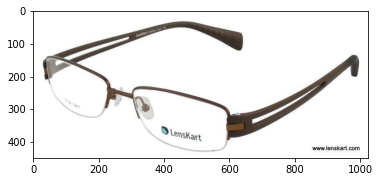

In [26]:
path = train_files.filepath[0]
print(path)
img = cv2.imread('/content/drive/MyDrive/india_today_ml_asst/'+path)
plt.imshow(img)

# Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [30]:
def encoder_decoder_model():

  """
  Used to build Convolutional Autoencoder model architecture to get compressed image data which is easier to process.
  Returns:
  Auto encoder model
  """
  #Encoder

  model = Sequential(name='Convolutional_AutoEncoder_Model')
  model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 3),padding='same', name='Encoding_Conv2D_1'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_1'))
  model.add(Conv2D(128, kernel_size=(3, 3),strides=1,kernel_regularizer = tf.keras.regularizers.L2(0.001),activation='relu',padding='same', name='Encoding_Conv2D_2'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_2'))
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.001), padding='same', name='Encoding_Conv2D_3'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_3'))
  # model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.001), padding='same', name='Encoding_Conv2D_4'))
  # model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding='valid', name='Encoding_MaxPooling2D_4'))
  # model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Encoding_Conv2D_5'))
  # model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
    
  #Decoder
  
  # model.add(Conv2D(512, kernel_size=(3, 3), kernel_regularizer = tf.keras.regularizers.L2(0.001),activation='relu', padding='same', name='Decoding_Conv2D_1'))
  # model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_1'))
  # model.add(Conv2D(512, kernel_size=(3, 3), kernel_regularizer = tf.keras.regularizers.L2(0.001), activation='relu', padding='same', name='Decoding_Conv2D_2'))
  # model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_2'))
  model.add(Conv2D(256, kernel_size=(3, 3), kernel_regularizer = tf.keras.regularizers.L2(0.001), activation='relu', padding='same',name='Decoding_Conv2D_3'))
  model.add(UpSampling2D((2, 2),name='Decoding_Upsamping2D_3'))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.001), padding='same',name='Decoding_Conv2D_4'))
  model.add(UpSampling2D((2, 2),name='Decoding_Upsamping2D_4'))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.001), padding='same',name='Decoding_Conv2D_5'))
  model.add(UpSampling2D((2, 2),name='Decoding_Upsamping2D_5'))
  model.add(Conv2D(3, kernel_size=(3, 3), padding='same',activation='sigmoid',name='Decoding_Output'))
  return model
    
model = encoder_decoder_model()
model.summary()

Model: "Convolutional_AutoEncoder_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoding_Conv2D_1 (Conv2D)   (None, 224, 224, 64)      1792      
_________________________________________________________________
Encoding_MaxPooling2D_1 (Max (None, 112, 112, 64)      0         
_________________________________________________________________
Encoding_Conv2D_2 (Conv2D)   (None, 112, 112, 128)     73856     
_________________________________________________________________
Encoding_MaxPooling2D_2 (Max (None, 56, 56, 128)       0         
_________________________________________________________________
Encoding_Conv2D_3 (Conv2D)   (None, 56, 56, 256)       295168    
_________________________________________________________________
Encoding_MaxPooling2D_3 (Max (None, 28, 28, 256)       0         
_________________________________________________________________
Decoding_Conv2D_3 (Conv2D)   (None,

In [31]:
optimizer = Adam(learning_rate=0.001) 
model = encoder_decoder_model() 
model.compile(optimizer=optimizer, loss='mse') 
early_stopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=6,min_delta=0.0001) 
checkpoint = ModelCheckpoint('/content/drive/My Drive/encoder_model.h5', monitor='val_loss', mode='min', save_best_only=True) 

In [32]:
model.fit(train_data, train_data, epochs=10, batch_size=32,validation_data=(test_data,test_data),callbacks=[early_stopping,checkpoint])

Epoch 1/10
49/49 [==============================] - 67s 575ms/step - loss: 0.3706 - val_loss: 0.1486
Epoch 2/10
49/49 [==============================] - 24s 501ms/step - loss: 0.1305 - val_loss: 0.0901
Epoch 3/10
49/49 [==============================] - 24s 496ms/step - loss: 0.1062 - val_loss: 0.1044
Epoch 4/10
49/49 [==============================] - 24s 492ms/step - loss: 0.1107 - val_loss: 0.1000
Epoch 5/10
49/49 [==============================] - 24s 493ms/step - loss: 0.1138 - val_loss: 0.1022
Epoch 6/10
49/49 [==============================] - 24s 490ms/step - loss: 0.1090 - val_loss: 0.0988
Epoch 7/10
49/49 [==============================] - 24s 493ms/step - loss: 0.1065 - val_loss: 0.0970
Epoch 8/10
49/49 [==============================] - 24s 495ms/step - loss: 0.1046 - val_loss: 0.0899
Epoch 9/10
49/49 [==============================] - 24s 496ms/step - loss: 0.0845 - val_loss: 0.1000
Epoch 10/10
49/49 [==============================] - 24s 495ms/step - loss: 0.0858 - val_lo

In [38]:

def plot_(x,y1,y2,row,col,ind,title,xlabel,ylabel,label,isimage=False,color='r'):

    """
    This function is used for plotting images and graphs (Visualization of end results of model training)
    Arguments:
    x - (np.ndarray or list) - an image array
    y1 - (list) - for plotting graph on left side.
    y2 - (list) - for plotting graph on right side.
    row - (int) - row number of subplot
    col - (int) - column number of subplot
    ind - (int) - index number of subplot
    title - (string) - title of the plot 
    xlabel - (list) - labels of x axis
    ylabel - (list) - labels of y axis
    label - (string) - for adding legend in the plot
    isimage - (boolean) - True in case of image else False
    color - (char) - color of the plot (prefered green for training and red for testing).
    """
    
    plt.subplot(row,col,ind)
    if isimage:
        plt.imshow(x)
        plt.title(title)
        plt.axis('off')
    else:
        plt.plot(y1,label=label,color='g'); plt.scatter(x,y1,color='g')
        if y2!='': plt.plot(y2,color=color,label='validation'); plt.scatter(x,y2,color=color)
        plt.grid()
        plt.legend()
        plt.title(title); plt.xlabel(xlabel); plt.ylabel(ylabel)

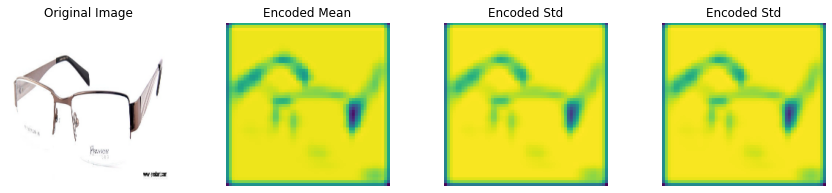

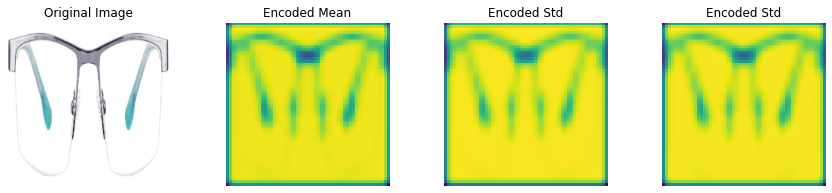

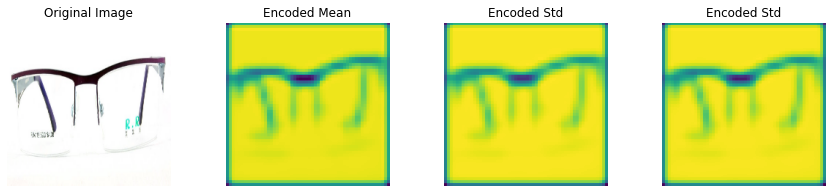

In [39]:
for index in [2,7,9]:   # 3 random images
    plt.figure(figsize=(15,3))
    plot_(train_data[index],'','',1,4,1,"Original Image","","",'',True)
    plot_(encoded[index].mean(axis=-1),'','',1,4,2,"Encoded Mean","","",'',True)
    plot_(encoded[index].max(axis=-1),'','',1,4,3,"Encoded Std","","",'',True)
    plot_(encoded[index].std(axis=-1),'','',1,4,4,"Encoded Std","","",'',True)
    plt.show()

In [47]:
from keras import backend as K

def feature_extraction(model, data, layer = 14):

    """
    Creating a function to run the initial layers of the encoder model. (to get feature extraction from any layer of the model)
    Arguments:
    model - (Auto encoder model) - Trained model
    data - (np.ndarray) - list of images to get feature extraction from trained model
    layer - (int) - from which layer to take the features(by default = 4)
    Returns:
    pooled_array - (np.ndarray) - array of extracted features of given images
    """

    encoded = K.function([model.layers[0].input],[model.layers[layer].output])
    encoded_array = encoded([data])[0]
    pooled_array = encoded_array.max(axis=-1)
    return encoded_array

encoded = feature_extraction(model,train_data[:10],9)

In [48]:
# min_train = []; min_val = []  
# rates = list(parameters.keys())
# epochs = [0,1,2,3,4]
# for i in result:
#     train = []; val = []
#     for j in i:
#         train.append(min(j['loss'])); val.append(min(j['val_loss']))  # taking minimum loss of each optimizer over all learning rates.
#     min_train.append(min(train)); min_val.append(min(val))
# plt.figure(figsize=(20,5))
# plot_(rates,min_train,min_val,1,2,1,'Minimum loss given by each Optimizer','Optimizer','Loss','training',False,'r')
# # plotting the result of adam with learning rate = 0.001 .
# plot_(epochs, result[1][1]['loss'],result[1][1]['val_loss'],1,2,2,'Loss on each epochs using Adam with learning rate = 0.001','Epochs','loss','training',False,'r')
# plt.show()

In [49]:
def get_batches(data, batch_size=1000):

    """
    Taking batch of images for extraction of images.
    Arguments:
    data - (np.ndarray or list) - list of image array to get extracted features.
    batch_size - (int) - Number of images per each batch
    Returns:
    list - extracted features of each images
    """

    if len(data) < batch_size:
        return [data]
    n_batches = len(data) // batch_size
    
    # If batches fit exactly into the size of df.
    if len(data) % batch_size == 0:
        return [data[i*batch_size:(i+1)*batch_size] for i in range(n_batches)]   

    # If there is a remainder.
    else:
        return [data[i*batch_size:min((i+1)*batch_size, len(data))] for i in range(n_batches+1)]

In [50]:
d = np.concatenate([train_data,test_data],axis=0)
d.shape

(1845, 224, 224, 3)

In [51]:
X_encoded = []
i=0
# Iterate through the full training set.
for batch in get_batches(d, batch_size=300):
    i+=1
    # This line runs our pooling function on the model for each batch.
    X_encoded.append(feature_extraction(model, batch),12)
    
X_encoded = np.concatenate(X_encoded)

IndexError: ignored